<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Sampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Techniques in Statistics

In this notebook, we will explore four primary sampling strategies used in statistics and data science:

1. Simple Random Sampling
2. Stratified Sampling
3. Systematic Sampling
4. Cluster Sampling

Each technique has its advantages and disadvantages depending on the data's structure and the research's objective.

## Scenario

Imagine a large company wants to survey its employees about their job satisfaction. There are thousands of employees across multiple departments, age groups, and locations. For accurate insights, selecting a sample that represents the population without needing to survey every individual is crucial.


In [1]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate a sample dataset
n = 1000  # total employees
departments = ["Engineering", "HR", "Sales", "Marketing", "Finance"]
locations = ["London", "Manchester", "Birmingham", "Edinburgh", "Bristol"]
ages = np.random.randint(22, 60, n)
departments_sample = np.random.choice(departments, n)
locations_sample = np.random.choice(locations, n)

# Create DataFrame
data = pd.DataFrame({
    "EmployeeID": range(1, n + 1),
    "Age": ages,
    "Department": departments_sample,
    "Location": locations_sample
})

data.head()

,EmployeeID,Age,Department,Location
0,1,50,Finance,Edinburgh
1,2,36,Engineering,Edinburgh
2,3,29,Finance,London
3,4,42,Finance,London
4,5,40,Sales,Bristol


## 1. Simple Random Sampling

Simple Random Sampling is a basic sampling method where each individual has an equal probability of being selected.

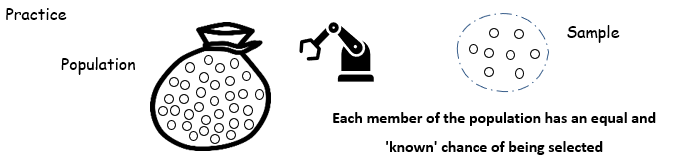

### Code Example


In [2]:
# Sample 10% of the employees randomly
sample_size = int(0.1 * len(data))
simple_random_sample = data.sample(sample_size, random_state=42)

print(simple_random_sample)

     EmployeeID  Age   Department    Location
521         522   24      Finance     Bristol
737         738   36      Finance      London
740         741   49           HR   Edinburgh
660         661   45      Finance   Edinburgh
411         412   33  Engineering     Bristol
..          ...  ...          ...         ...
436         437   46        Sales  Manchester
764         765   58        Sales      London
88           89   30        Sales  Birmingham
63           64   42        Sales      London
826         827   22      Finance      London

[100 rows x 4 columns]


### Pros and Cons

- **Pros**: Simple to implement and understand; unbiased if sample size is large.
- **Cons**: Can be unrepresentative for small sample sizes, especially if the population is diverse.

## 2. Stratified Sampling

Stratified Sampling divides the population into distinct subgroups (strata) and samples from each stratum proportionally.
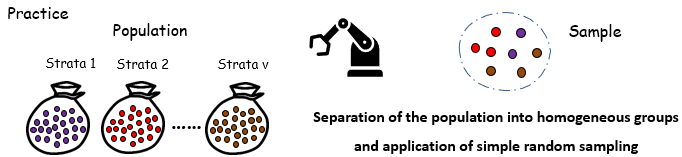

### Example

We can stratify by `Department`, ensuring each department is proportionately represented.

In [3]:
stratified_sample = pd.DataFrame()

for department in data.groupby("Department"):
    dep_name, group = department  # Unpacking
    stratified_sample = pd.concat([stratified_sample, group.sample(frac=0.1, random_state=42)])
    #print(dep_name)
    #print(group)
print(stratified_sample)

     EmployeeID  Age   Department    Location
313         314   41  Engineering  Birmingham
553         554   32  Engineering  Birmingham
86           87   49  Engineering   Edinburgh
718         719   29  Engineering     Bristol
779         780   58  Engineering     Bristol
..          ...  ...          ...         ...
247         248   42        Sales     Bristol
78           79   45        Sales     Bristol
862         863   46        Sales  Manchester
943         944   52        Sales   Edinburgh
408         409   54        Sales  Manchester

[100 rows x 4 columns]


**Exercise:**Research how to implement stratified sampling using python libraries.


### Pros and Cons

- **Pros**: Ensures representation of key subgroups; reduces sampling bias.
- **Cons**: Requires knowledge of subgroups; more complex to administer.

## 3. Systematic Sampling

Systematic Sampling selects every k-th individual from a list after a random start. This approach is effective when there's no underlying pattern in the data.

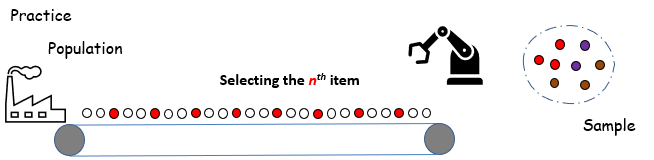

### Example

Let’s select every 10th employee from a shuffled list.

In [4]:
# Systematic sampling: select every 10th employee
k = 10
systematic_sample = data[::k]
print(systematic_sample)

     EmployeeID  Age   Department    Location
0             1   50      Finance   Edinburgh
10           11   45    Marketing   Edinburgh
20           21   33        Sales  Manchester
30           31   42        Sales  Manchester
40           41   49        Sales  Manchester
..          ...  ...          ...         ...
950         951   22    Marketing     Bristol
960         961   30      Finance  Birmingham
970         971   39        Sales      London
980         981   54           HR   Edinburgh
990         991   43  Engineering     Bristol

[100 rows x 4 columns]


**Exercise**
Implement the systematic sampling using a for loop.

### Pros and Cons

- **Pros**: Easy to execute; can spread samples across the entire population.
- **Cons**: Can introduce bias if there's a hidden pattern that aligns with the sampling interval.

## 4. Cluster Sampling

Cluster Sampling divides the population into clusters and randomly selects entire clusters for the sample.


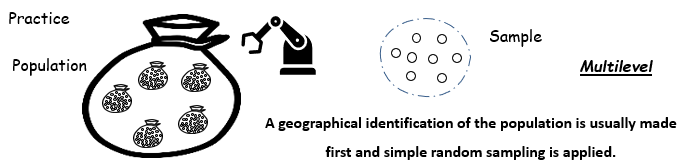
### Example

If we consider `Location` as clusters, we can randomly select two locations and survey all employees in those locations.

In [5]:
# Select random clusters (locations) and include all employees in those clusters
chosen_clusters = np.random.choice(locations, 2, replace=False)
cluster_sample = data[data["Location"].isin(chosen_clusters)]

print(cluster_sample)

     EmployeeID  Age   Department    Location
4             5   40        Sales     Bristol
8             9   45           HR     Bristol
12           13   43           HR     Bristol
16           17   59      Finance     Bristol
19           20   54           HR     Bristol
..          ...  ...          ...         ...
992         993   28  Engineering     Bristol
994         995   53    Marketing     Bristol
995         996   34        Sales     Bristol
998         999   40        Sales     Bristol
999        1000   53      Finance  Birmingham

[396 rows x 4 columns]


### Pros and Cons

- **Pros**: Cost-effective for large populations; ideal when clusters are naturally occurring.
- **Cons**: Higher risk of sampling error if clusters are not diverse or representative.

## Summary

| Sampling Method        | Pros                                                      | Cons                                                       |
|------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| Simple Random Sampling | Unbiased, easy to understand                              | May not be representative if population is diverse         |
| Stratified Sampling    | Reduces sampling bias, ensures subgroup representation    | Requires detailed knowledge of population strata           |
| Systematic Sampling    | Simple to implement, good spread                          | Risk of bias if periodic pattern exists                    |
| Cluster Sampling       | Cost-effective, useful for large and geographically dispersed populations | Risk of unrepresentative sample if clusters are homogeneous |